# Provenance Graph for Survey Exercise

The [PROV Data Model](https://www.w3.org/TR/2013/REC-prov-dm-20130430/) is the W3C's recommended format for representing data provenance information.

Its primary building blocks are Entities, Activities, and Agents, which are connected by various relations, the most essential of which are shown in the official diagram here:

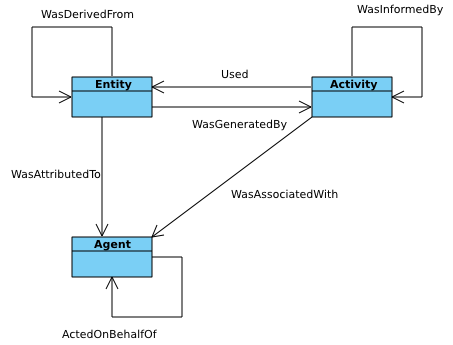

In [1]:
from IPython.display import Image
Image('essentials.png')

Here I attempt to use [Dong Huynh](https://kclpure.kcl.ac.uk/portal/dong.huynh.html)'s [purpose-made Python package](https://github.com/trungdong/prov/) (which comes with an excellent and simple Jupyter notebook [tutorial](https://nbviewer.jupyter.org/github/trungdong/notebooks/blob/master/PROV%20Tutorial.ipynb)) to map the provenance of the various outputs of the Survey Exercise we've been doing for the first day of our *Understanding Data and Its Environment* module.

In [2]:
from prov.model import ProvDocument

In [3]:
# Create a new provenance document
doc = ProvDocument()

In [4]:
# first we need to add 'namespaces' for everything
doc.add_namespace('mnc','https://www.manchester.ac.uk/')
doc.add_namespace('lv','https://www.liverpool.ac.uk/')
doc.add_namespace('ld','http://www.leeds.ac.uk/')
doc.add_namespace('shf','https://www.sheffield.ac.uk/')
doc.add_namespace('cdt','https://datacdt.org/')
doc.add_namespace('wtr','https://en.wikipedia.org/wiki/United_Kingdom_water_companies')
doc.add_namespace('land','https://www.gov.uk/government/organisations/land-registry')
doc.add_namespace('drv','https://www.gov.uk/government/organisations/driver-and-vehicle-licensing-agency')
doc.add_namespace('sprt','https://www.siv.org.uk/')
doc.add_namespace('fict','Fictional Personas')
doc.add_namespace('srv', 'Surveys')
doc.add_namespace('md', 'Metadata Schemas')
doc.add_namespace('ci', 'Combined Indicator')

<Namespace: ci {Combined Indicator}>

In [5]:
# then we add 'agents'

## instructor
doc.agent('mnc:Nuno Pinto')

## student groups
doc.agent('mnc:Manchester Students')
doc.agent('lv:Liverpool Students')
doc.agent('ld:Leeds Students')
doc.agent('shf:Sheffield Students')

## the public bodies we pretended to do a survey for
doc.agent('wtr:Water Company')
doc.agent('land:Land Registry')
doc.agent('drv:Driver and Vehicle Licensing Agency')
doc.agent('sprt: Sheffield Local Authority Sports')

## the fictional personas we responded with
doc.agent('fict: Fictional Personas')

<ProvAgent: fict: Fictional Personas>

In [6]:
# then we add 'entities'

## add four surveys
q1 = doc.entity('wtr:Survey Questions')
q2 = doc.entity('land:Survey Questions')
q3 = doc.entity('drv:Survey Questions')
q4 = doc.entity('sprt:Survey Questions')

In [7]:
# create collection of all survey questions
q = doc.entity('cdt:Links to all Survey Questions')
q.hadMember(q1)
q.hadMember(q2)
q.hadMember(q3)
q.hadMember(q4)

<ProvEntity: cdt:Links to all Survey Questions>

In [8]:
# completed survey datasets
d1 = doc.entity('wtr:Completed Survey')
d2 = doc.entity('land:Completed Survey')
d3 = doc.entity('drv:Completed Survey')
d4 = doc.entity('sprt:Completed Survey')

In [9]:
# add metadata
m1 = doc.entity('wtr:Metadata Schema')
m2 = doc.entity('land:Metadata Schema')
m3 = doc.entity('drv:Metadata Schema')
m4 = doc.entity('sprt:Metadata Schema')

In [10]:
i1 = doc.entity('lv:Wealth Index')

In [11]:
ex = doc.entity('cdt:Survey Exercise')
doc.wasAssociatedWith('mnc:Nuno Pinto','cdt:Survey Exercise')

<ProvAssociation: (mnc:Nuno Pinto, cdt:Survey Exercise)>

In [12]:
cdt = doc.entity('cdt:Cohort')
cdt.hadMember('lv:Liverpool Students')
cdt.hadMember('ld:Leeds Students')
cdt.hadMember('mnc:Manchester Students')
cdt.hadMember('shf:Sheffield Students')

<ProvEntity: cdt:Cohort>

In [13]:
write = doc.activity('cdt:Writing Survey Questions')
doc.wasStartedBy(write, ex)
doc.wasAssociatedWith(write, cdt)

<ProvAssociation: (cdt:Writing Survey Questions, cdt:Cohort)>

In [14]:
r = doc.activity('fict:Responding to Survey')

In [15]:
doc.used(r, q)

<ProvUsage: (fict:Responding to Survey, cdt:Links to all Survey Questions)>

In [16]:
doc.wasGeneratedBy(d1, r)
doc.wasGeneratedBy(d2, r)
doc.wasGeneratedBy(d3, r)
doc.wasGeneratedBy(d4, r)

doc.wasAssociatedWith(r, 'fict: Fictional Personas')
doc.actedOnBehalfOf('fict: Fictional Personas', 'mnc:Manchester Students')
doc.actedOnBehalfOf('fict: Fictional Personas', 'lv:Liverpool Students')
doc.actedOnBehalfOf('fict: Fictional Personas', 'ld:Leeds Students')
doc.actedOnBehalfOf('fict: Fictional Personas', 'shf:Sheffield Students')

<ProvDelegation: (fict: Fictional Personas, shf:Sheffield Students)>

In [17]:
doc.actedOnBehalfOf('wtr:Water Company', 'mnc:Manchester Students')
doc.actedOnBehalfOf('land:Land Registry', 'lv:Liverpool Students')
doc.actedOnBehalfOf('drv:Driver and Vehicle Licensing Agency', 'ld:Leeds Students')
doc.actedOnBehalfOf('sprt: Sheffield Local Authority Sports', 'shf:Sheffield Students')

<ProvDelegation: (sprt: Sheffield Local Authority Sports, shf:Sheffield Students)>

In [18]:
doc.wasAttributedTo(q1, 'wtr:Water Company')
doc.wasAttributedTo(q2, 'land:Land Registry')
doc.wasAttributedTo(q3, 'drv:Driver and Vehicle Licensing Agency')
doc.wasAttributedTo(q4, 'sprt: Sheffield Local Authority Sports')

<ProvAttribution: (sprt:Survey Questions, sprt: Sheffield Local Authority Sports)>

In [19]:
doc.wasAttributedTo(d1, 'wtr:Water Company')
doc.wasAttributedTo(d2, 'land:Land Registry')
doc.wasAttributedTo(d3, 'drv:Driver and Vehicle Licensing Agency')
doc.wasAttributedTo(d4, 'sprt: Sheffield Local Authority Sports')

<ProvAttribution: (sprt:Completed Survey, sprt: Sheffield Local Authority Sports)>

In [20]:
doc.wasAttributedTo(m1, 'wtr:Water Company')
doc.wasAttributedTo(m2, 'land:Land Registry')
doc.wasAttributedTo(m3, 'drv:Driver and Vehicle Licensing Agency')
doc.wasAttributedTo(m4, 'sprt: Sheffield Local Authority Sports')

<ProvAttribution: (sprt:Metadata Schema, sprt: Sheffield Local Authority Sports)>

In [21]:
doc.wasDerivedFrom(m1,d1)
doc.wasDerivedFrom(m2,d2)
doc.wasDerivedFrom(m3,d3)
doc.wasDerivedFrom(m4,d4)

doc.wasDerivedFrom(i1,m2)
doc.wasDerivedFrom(i1,m3)

<ProvDerivation: (lv:Wealth Index, drv:Metadata Schema)>

In [22]:
ex1 = doc.activity('cdt:Creating Metadata')
doc.wasAttributedTo('cdt:Creating Metadata',cdt)

<ProvAttribution: (cdt:Creating Metadata, cdt:Cohort)>

In [23]:
ex2 = doc.activity('lv:Creating Indicator')
ex2a = doc.activity('lv:Linking Datasets')
doc.wasAttributedTo(ex2a,'lv:Liverpool Students')
doc.wasAttributedTo(ex2,'lv:Liverpool Students')
doc.used(ex2,ex2a)
doc.used(ex2a,d1)
doc.used(ex2a,d2)
doc.used(ex2a,d3)
doc.used(ex2a,d4)
doc.used(ex2,m2)
doc.used(ex2,m3)
doc.wasGeneratedBy(i1,ex2)

<ProvGeneration: (lv:Wealth Index, lv:Creating Indicator)>

In [24]:
doc.wasGeneratedBy(m1, ex1)
doc.wasGeneratedBy(m2, ex1)
doc.wasGeneratedBy(m3, ex1)
doc.wasGeneratedBy(m4, ex1)

<ProvGeneration: (sprt:Metadata Schema, cdt:Creating Metadata)>

Well, that was a bit slow and painful. I've tried to be quite thorough (although there are plenty of things I could have put that I didn't, like the Survey Making App we had to use). And maybe there are more efficient ways of setting this down if I understood [the code](https://prov.readthedocs.io/en/latest/prov.html#module-prov.model) better...

Anyway, now we can visualize it:

In [25]:
# visualize the graph
from prov.dot import prov_to_dot
dot = prov_to_dot(doc)
dot.write_png('article-prov.png')

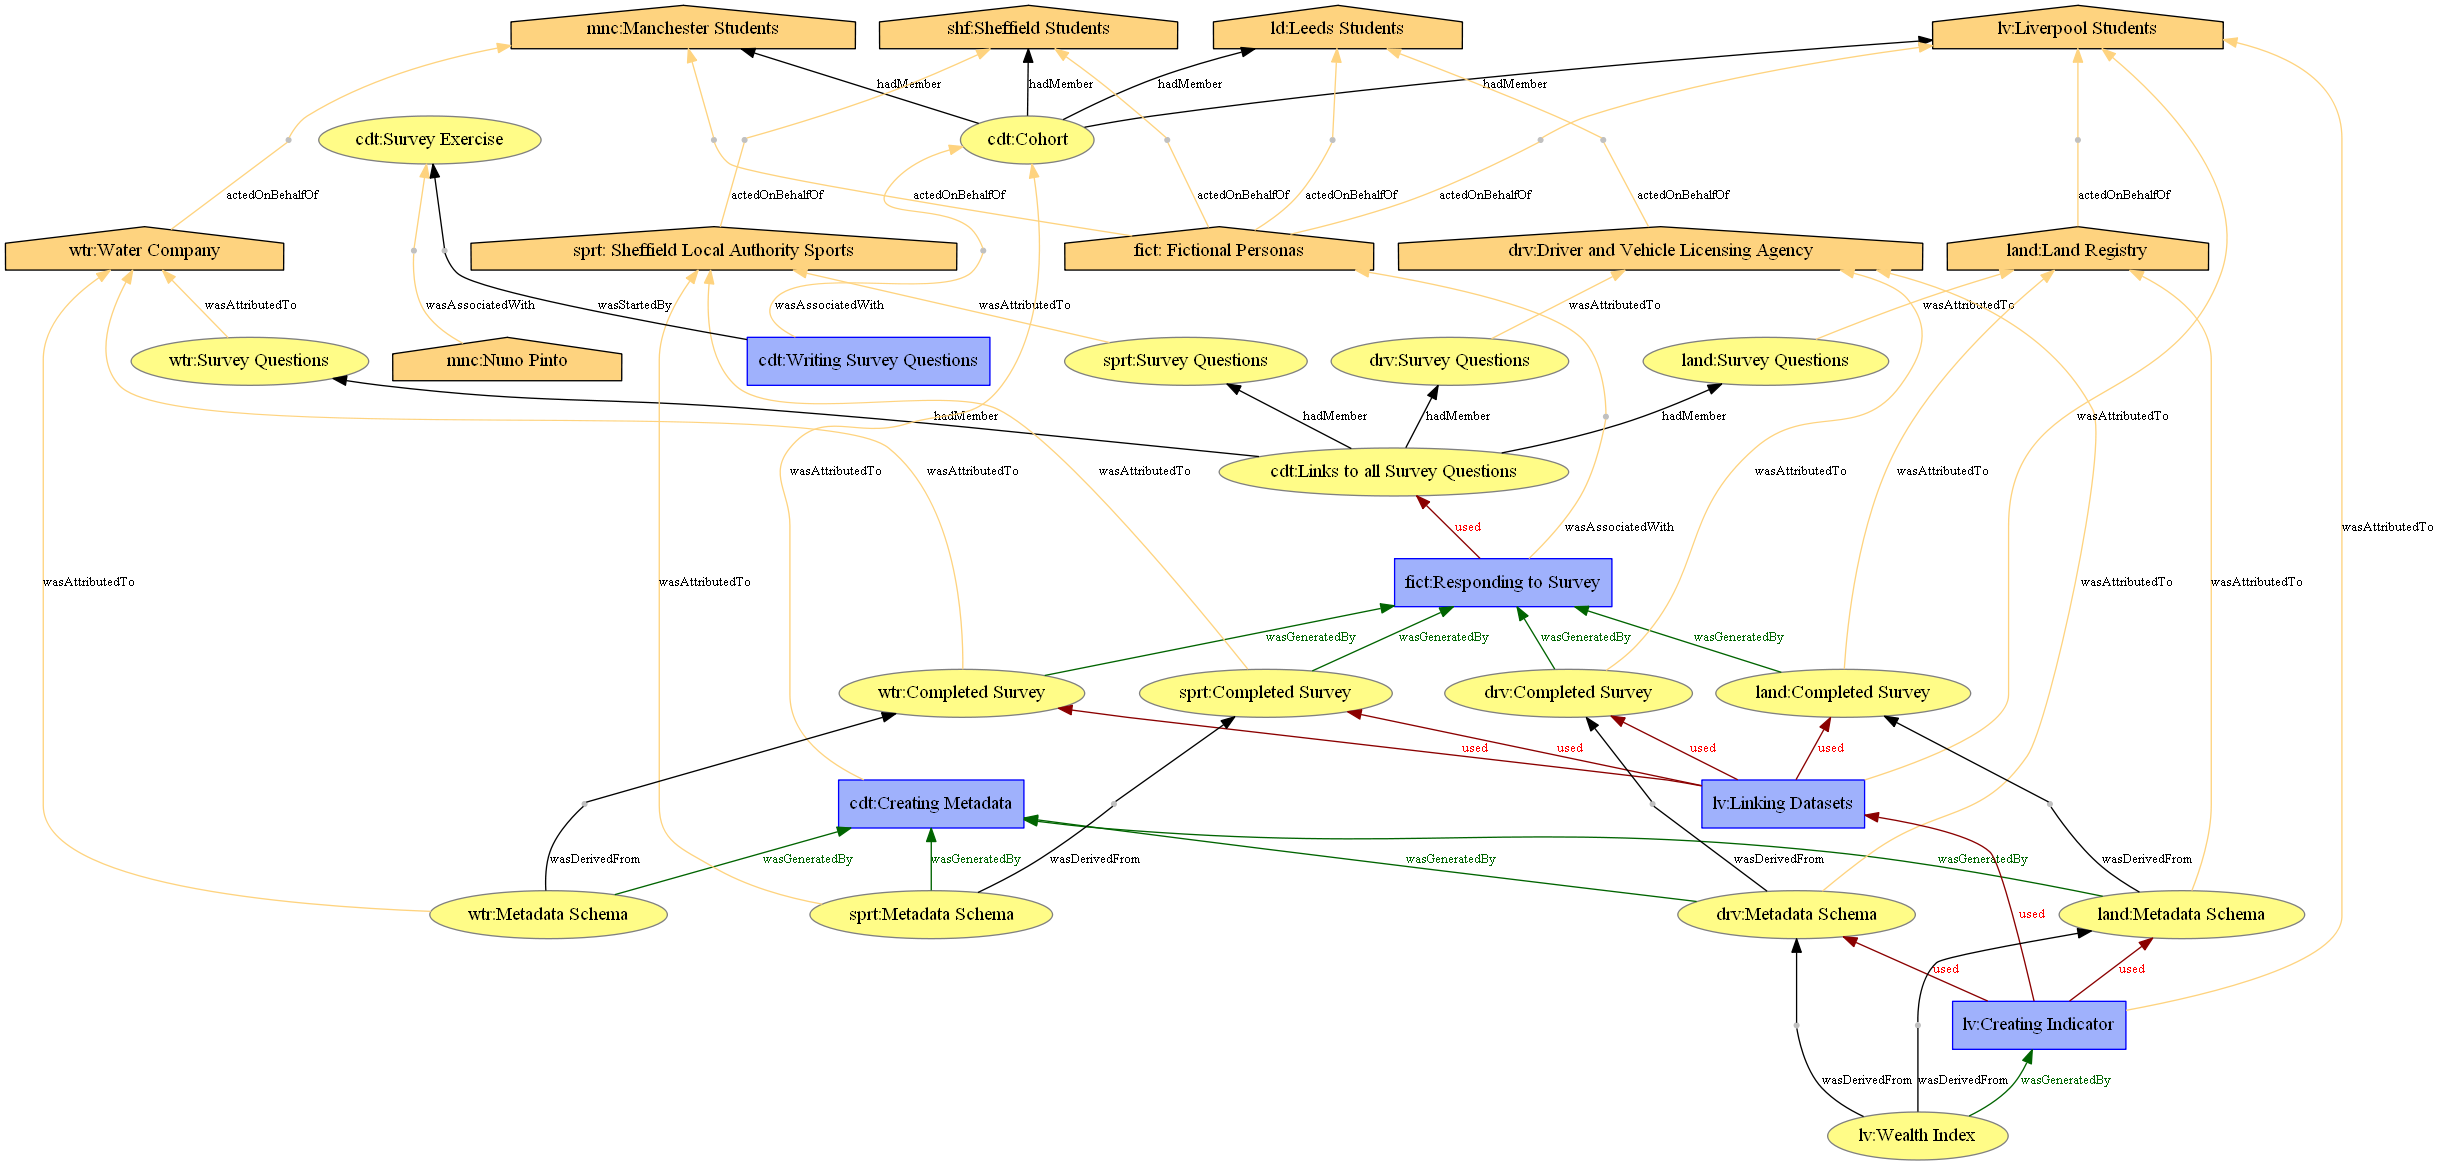

In [26]:
Image('article-prov.png')

Well, what a beautiful diagram we have. 